<a href="https://colab.research.google.com/github/sirb2/Data-Visualization-Projects-with-Python-Libraries/blob/main/Dataset_Analysis_with_pandas_library.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Goal of the Project

This project is designed for you to practice and solve the activities that are based on the concepts covered in the following lessons:

 1. Simple linear regression III - Model Evaluation
 

### Problem Statement

The most important factor for an Insurance Company is to determine what premium charges must be paid by an individual. The charges depend on various factors like age, gender, income, etc. 

Build a model that is capable of predicting the insurance charges a person has to pay depending on his/her age using simple linear regression. Also, evaluate the accuracy of your model by calculating the value of error metrics such as R-squared, MSE, RMSE, and MAE.





#### Activity 1:  Analysing the Dataset

- Create a Pandas DataFrame for **Insurance** dataset using the below link. This dataset consists of following columns:

|Field|Description|
|---:|:---|
|age|Age of primary beneficiary|
|sex|Insurance contractor gender, female or male|
|bmi|Body mass index|
|children|Number of children covered by health insurance/number of dependents|
|region|Beneficiary's residential area in the US, northeast, southeast, southwest, northwest|
|charges|Individual medical costs billed by health insurance|


  **Dataset Link:** https://s3-student-datasets-bucket.whjr.online/whitehat-ds-datasets/insurance_dataset.csv

- Print the first five rows of the dataset. Check for null values and treat them accordingly.

- Create a regression plot with `age` on X-axis and `charges` on Y-axis to identify the relationship between these two attributes.




In [ ]:
# Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Load the dataset
# Dataset Link: 'https://s3-student-datasets-bucket.whjr.online/whitehat-ds-datasets/insurance_dataset.csv'
df = pd.read_csv('https://s3-student-datasets-bucket.whjr.online/whitehat-ds-datasets/insurance_dataset.csv')
# Print first five rows using head() function
df.head()

,age,sex,bmi,children,region,charges
0,18,male,33.770,1,southeast,1725.55230
1,28,male,33.000,3,southeast,4449.46200
2,33,male,22.705,0,northwest,21984.47061
3,32,male,28.880,0,northwest,3866.85520
4,31,female,25.740,0,southeast,3756.62160


In [ ]:
# Check if there are any null values. If any column has null values, treat them accordingly
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
region      0
charges     0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


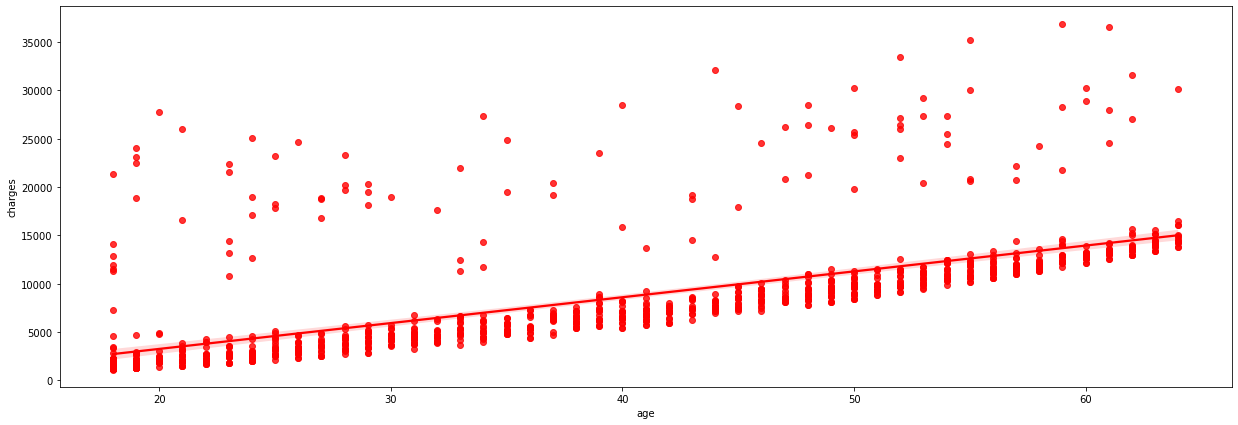

In [ ]:
# Create a regression plot between 'age' and 'charges'
plt.figure(figsize = (21, 7))
sns.regplot(df['age'], df['charges'], color = 'red')
plt.show()

---

#### Activity 2: Train-Test Split

We have to determine the effect of `age` on insurance charges. Thus, `age` is the feature variable and `charges` is the target variable. 

Split the dataset into training set and test set such that the training set contains 67% of the instances and the remaining instances will become the test set.

In [ ]:
# Split the DataFrame into the training and test sets.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df['age'], df['charges'], test_size = 0.33, random_state = 41)

---

#### Activity 3: Model Training

Implement simple linear regression using `sklearn` module in the following way:

1. Reshape the feature and the target variable arrays into two-dimensional arrays by using `reshape(-1, 1)` function of numpy module.
2. Deploy the model by importing the `LinearRegression` class and create an object of this class.
3. Call the `fit()` function on the LinearRegression object and print the slope and intercept values of the best fit line.


In [ ]:
# 1. Create two-dimensional NumPy arrays for the feature and target variables. 
# Print the shape or dimensions of these reshaped arrays
def reshape_(frame):
  return frame.values.reshape(-1, 1)
x_train_reshaped = reshape_(x_train)
x_test_reshaped = reshape_(x_test)
y_train_reshaped = reshape_(y_train)
y_test_reshaped = reshape_(y_test)
print(x_train_reshaped.shape)
print(x_test_reshaped.shape)
print(y_train_reshaped.shape)
print(y_test_reshaped.shape)

(712, 1)
(352, 1)
(712, 1)
(352, 1)


In [ ]:
# 2. Deploy linear regression model using the 'sklearn.linear_model' module.
from sklearn.linear_model import LinearRegression
# Create an object of the 'LinearRegression' class.
Anythingyoulike = LinearRegression()
# 3. Call the 'fit()' function
Anythingyoulike.fit(x_train_reshaped, y_train_reshaped)
 # Print the slope and intercept values
print(f"Slope: {Anythingyoulike.coef_[0][0]}\nIntercept: {Anythingyoulike.intercept_[0]}")

Slope: 273.020825164168
Intercept: -2402.06861107461


---

#### Activity 4: Model Prediction and Evaluation

Predict the values for both training and test sets by calling the `predict()` function on the LinearRegression object. Also, calculate the $R^2$, MSE, RMSE and MAE values to evaluate the accuracy of your model.

In [ ]:
# Predict the target variable values for both training set and test set

# Call 'r2_score', 'mean_squared_error' & 'mean_absolute_error' functions of the 'sklearn' module. Calculate RMSE value by taking the square root of MSE.
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

y_train_pred = Anythingyoulike.predict(x_train_reshaped)
y_test_pred = Anythingyoulike.predict(x_test_reshaped)

# Print these values for both training set and test set
print(f"Train Set\n{'-' * 50}")
print(f"R-squared: {r2_score(y_train_reshaped, y_train_pred):.3f}")
print(f"Mean Squared Error: {mean_squared_error(y_train_reshaped, y_train_pred):.3f}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_train_reshaped, y_train_pred)):.3f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_train_reshaped, y_train_pred):.3f}")
      
print(f"\n\nTest Set\n{'-' * 50}")
print(f"R-squared: {r2_score(y_test_reshaped, y_test_pred):.3f}")
print(f"Mean Squared Error: {mean_squared_error(y_test_reshaped, y_test_pred):.3f}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test_reshaped, y_test_pred)):.3f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test_reshaped, y_test_pred):.3f}")


Train Set
--------------------------------------------------
R-squared: 0.421
Mean Squared Error: 20243978.701
Root Mean Squared Error: 4499.331
Mean Absolute Error: 2449.334


Test Set
--------------------------------------------------
R-squared: 0.341
Mean Squared Error: 24803838.351
Root Mean Squared Error: 4980.345
Mean Absolute Error: 2662.909


---